In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#from os import listdir 

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

# Build exploration tools

In [2]:
# Img data: location and name
path = "data/datasets_full/"
options = [["RPE1wt_CEP152+GTU88+PCNT_1","DAPI","CEP152","GTU88","PCNT"], #Channel:0 ; subchannel:0,1,2,3
           ["RPE1wt_CEP63+CETN2+PCNT_1","DAPI","CEP63","CETN2","PCNT"], #Channel:1 ; subchannel:0,1,2,3
           ["RPE1wt_CP110+GTU88+PCNT_2","DAPI","CP110","GTU88","PCNT"]] #Channel:2 ; subchannel:0,1,2,3

# Centriole location csv
data = pd.read_csv("data/annotations.csv")
data.loc[40:50]

,image_name,ds_row,ds_col,channel_id,marker,focus_id,x,y
40,RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C1,0,0,1,CEP152,40,1305,1509
41,RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C1,0,0,1,CEP152,41,1298,1471
42,RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C1,0,0,1,CEP152,42,640,1464
43,RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C1,0,0,1,CEP152,43,731,1635
44,RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C1,0,0,1,CEP152,44,1991,1362
45,RPE1wt_CEP152+GTU88+PCNT_1_001_003_max_C1,1,3,1,CEP152,0,50,159
46,RPE1wt_CEP152+GTU88+PCNT_1_001_003_max_C1,1,3,1,CEP152,1,43,165
47,RPE1wt_CEP152+GTU88+PCNT_1_001_003_max_C1,1,3,1,CEP152,2,233,519
48,RPE1wt_CEP152+GTU88+PCNT_1_001_003_max_C1,1,3,1,CEP152,3,229,528
49,RPE1wt_CEP152+GTU88+PCNT_1_001_003_max_C1,1,3,1,CEP152,4,544,326


In [3]:
# Does all centriole subchannel are labeled with same # of centriole ? 
data.groupby([data.image_name,data.marker]).count().x.head(20)

image_name                                 marker
RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C1  CEP152    45
RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C2  GTU88     43
RPE1wt_CEP152+GTU88+PCNT_1_000_000_max_C3  PCNT      44
RPE1wt_CEP152+GTU88+PCNT_1_000_001_max_C1  CEP152    44
RPE1wt_CEP152+GTU88+PCNT_1_000_001_max_C2  GTU88     48
RPE1wt_CEP152+GTU88+PCNT_1_000_001_max_C3  PCNT      37
RPE1wt_CEP152+GTU88+PCNT_1_000_002_max_C1  CEP152    38
RPE1wt_CEP152+GTU88+PCNT_1_000_002_max_C2  GTU88     32
RPE1wt_CEP152+GTU88+PCNT_1_000_002_max_C3  PCNT      33
RPE1wt_CEP152+GTU88+PCNT_1_000_003_max_C1  CEP152    41
RPE1wt_CEP152+GTU88+PCNT_1_000_003_max_C2  GTU88     45
RPE1wt_CEP152+GTU88+PCNT_1_000_003_max_C3  PCNT      47
RPE1wt_CEP152+GTU88+PCNT_1_000_004_max_C1  CEP152    52
RPE1wt_CEP152+GTU88+PCNT_1_000_004_max_C2  GTU88     55
RPE1wt_CEP152+GTU88+PCNT_1_000_004_max_C3  PCNT      48
RPE1wt_CEP152+GTU88+PCNT_1_001_000_max_C1  CEP152    44
RPE1wt_CEP152+GTU88+PCNT_1_001_000_max_C2  GTU88     4

> No, the marker plays an important role

In [18]:
#***************************************************************************************************
#********************************** ACCESS PICTURE *************************************************
#***************************************************************************************************

def generatePaths(channel, id_, format_="tif", path=path):
    """ Generate 4 paths and title of sample """
    
    # generate path strings
    paths = [(path + 
            options[channel][0] + "/" +
            options[channel][C] + "/" +
            format_ + "/" +
            options[channel][0] +
            "_00" + str(id_[0]) + "_00" + str(id_[1]) + "_max_C" + str(C-1) +
            "." + format_)
            for C in range(1,5)]
    
    # generate main_title
    main_title = options[channel][0] +"_00" + str(id_[0]) + "_00" + str(id_[1])
    
    return paths, main_title


def generateNames(channel, id_):
    """ Get 4 names of subchannels C0,C1,C2,C3 """
    
    # generate titles
    titles = [options[channel][0] +"_00" + str(id_[0]) + "_00" + str(id_[1]) + "_max_C" + str(C-1) for C in range(1,5)] 
    return titles


def singleton(channel, id_, subchannel, format_="tif", path=path, show=False):
    """ Access single subchannel of specific sample """
    
    # Get paths and title of subchannels
    paths,_ = generatePaths(channel, id_, format_, path)
    titles = generateNames(channel, id_)
    
    # Read subchannel of interest
    curr = plt.imread(paths[subchannel], cv.IMREAD_UNCHANGED)
    
    # Display it
    if show:
        # Show subchannel of interest together with its title
        plt.imshow(curr)
        plt.title(titles[subchannel])
        
    # Or return it
    else: return curr
    

#***************************************************************************************************
#************************************* PLOT ********************************************************
#***************************************************************************************************
def show(channel, id_, format_="tif", path=path):
    """ Plot 2x2: C0,C1,C2,C3 """
    
    #Get paths, main title and title of subchannels
    paths, main_title = generatePaths(channel, id_, format_, path)
    titles = generateNames(channel, id_)
    
    # Plot all 4 subchannels of sample
    plt.figure(figsize=(20,20))
    for C in range(4):
        curr = cv.imread(paths[C] , cv.IMREAD_UNCHANGED) 
        plt.subplot(2, 2, C+1)
        plt.imshow(curr, cmap="jet")
        plt.title(options[channel][C+1] + '\n' + titles[C] +"."+ format_ )
    plt.suptitle(main_title +"."+ format_)
    plt.show()
    
#***************************************************************************************************
#********************************* MAGNIFY CENTRIOLE LOCATION  *************************************
#***************************************************************************************************
def coordinates(channel, id_, from_subchannel):
    """ Get coordinates of centrioles from csv"""
    xs = data[data.image_name == generateNames(channel, id_)[from_subchannel]].iloc[:,-2].to_numpy()
    ys = data[data.image_name == generateNames(channel, id_)[from_subchannel]].iloc[:,-1].to_numpy()
    return xs, ys


def count(figure, x, y, value, color, offsety):
    """ Write id of centriole at centriole's location """
    
    # offset x, otherwise id is print above centriole
    if (x + 25) < 2047: x = x + 35
    else: x = x-35
        
    # offset y, otherwise pair id is print above first id
    if offsety:
        if (y + 25) < 2047: y = y + 25
        else: y = y-25
        
    position = (x, y)
    cv.putText(
        figure, #numpy array on which text is written
        str(value), #text
        position, #position at which writing has to start
        cv.FONT_HERSHEY_SIMPLEX, #font family
        1, #font size
        (color,0,0), #font color
        3,
        lineType=cv.LINE_AA) #font stroke
    return figure


def magnifyCentriole(channel, id_, from_subchannel, on_subchannel=0, color=0,
                     format_="tif", path=path, flag=cv.IMREAD_UNCHANGED, amplifier="jet",
                     show=True, figure = np.zeros((1,1))):
    """ Add marker (id and/or frame) from data[channel, id_, from_subchannel] on figure = [channel, id_, on_subchannel]"""
    
    # get list of centrioles' coordinates
    xs, ys = coordinates(channel, id_, from_subchannel)
    
    # get figure to add labels on
    paths, main_title = generatePaths(channel, id_, format_, path)
    titles = generateNames(channel, id_)
    
    # you can pass either "raw" figure from data or preprocessed figure
    if figure.shape[0]==1: figure = cv.imread(paths[on_subchannel], flag)
    else: figure = figure
    
    #add the numbers
    i = 0
    x_pre = 0
    if format_=='tif': color = 255
    for x,y in zip (xs,ys):
        if abs(x_pre-x)<25: offsety = True
        else: offsety = False
        figure = count(figure, x, y, i, color=color, offsety=offsety)
        i += 1
        x_pre = x

    # just plot result
    if show:
        plt.imshow(figure)
        plt.title(titles[on_subchannel] + "."+ format_ + "\nwith labels from:\n " + titles[from_subchannel] + "." + format_ )
        plt.show()
    
    # return result as np.array
    else: return figure

def compare(channel, id_, from_subchannel, on_subchannel=0,
            format_="tif", path=path, flag=cv.IMREAD_UNCHANGED, amplifier="jet"):
    """ show centriole of "form_subchannel" on "on_subchannel" """
    
    titles = generateNames(channel, id_)
    
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(magnifyCentriole(channel, id_, from_subchannel, format_=format_, show=False))
    plt.title(titles[on_subchannel] + "."+ format_ + "\nwith labels from:\n " + titles[from_subchannel] + "." + format_ )

    plt.subplot(1,2,2)
    plt.imshow(magnifyCentriole(channel, id_, from_subchannel, on_subchannel=from_subchannel, format_=format_, show=False))
    plt.title(titles[from_subchannel] + "."+ format_ + "\nwith labels from:\n " + titles[from_subchannel] + "." + format_ )

### DEMO 

In [19]:
# Which sample ?
channel = 1
id_ = [3,3]

generatePaths(channel, id_)

(['data/datasets_full/RPE1wt_CEP63+CETN2+PCNT_1/DAPI/tif/RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C0.tif',
  'data/datasets_full/RPE1wt_CEP63+CETN2+PCNT_1/CEP63/tif/RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C1.tif',
  'data/datasets_full/RPE1wt_CEP63+CETN2+PCNT_1/CETN2/tif/RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C2.tif',
  'data/datasets_full/RPE1wt_CEP63+CETN2+PCNT_1/PCNT/tif/RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C3.tif'],
 'RPE1wt_CEP63+CETN2+PCNT_1_003_003')

In [20]:
generateNames(channel, id_)

['RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C0',
 'RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C1',
 'RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C2',
 'RPE1wt_CEP63+CETN2+PCNT_1_003_003_max_C3']

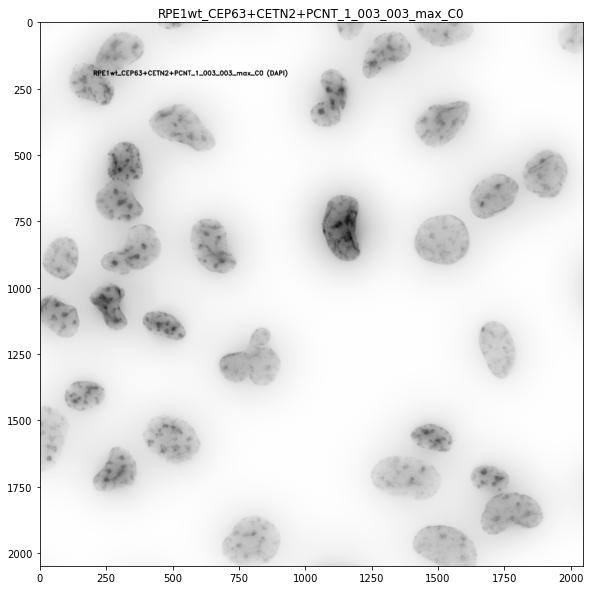

In [21]:
# plot singleton of 
# - channel1: RPE1wt_CEP63+CETN2+PCNT_1 | sample [3,3] | subchannel:
subchannel = 0

singleton(channel, id_, subchannel, format_='png', show=True)

# or store it for later use
_1_33_0 = singleton(channel, id_, subchannel, format_='tif')

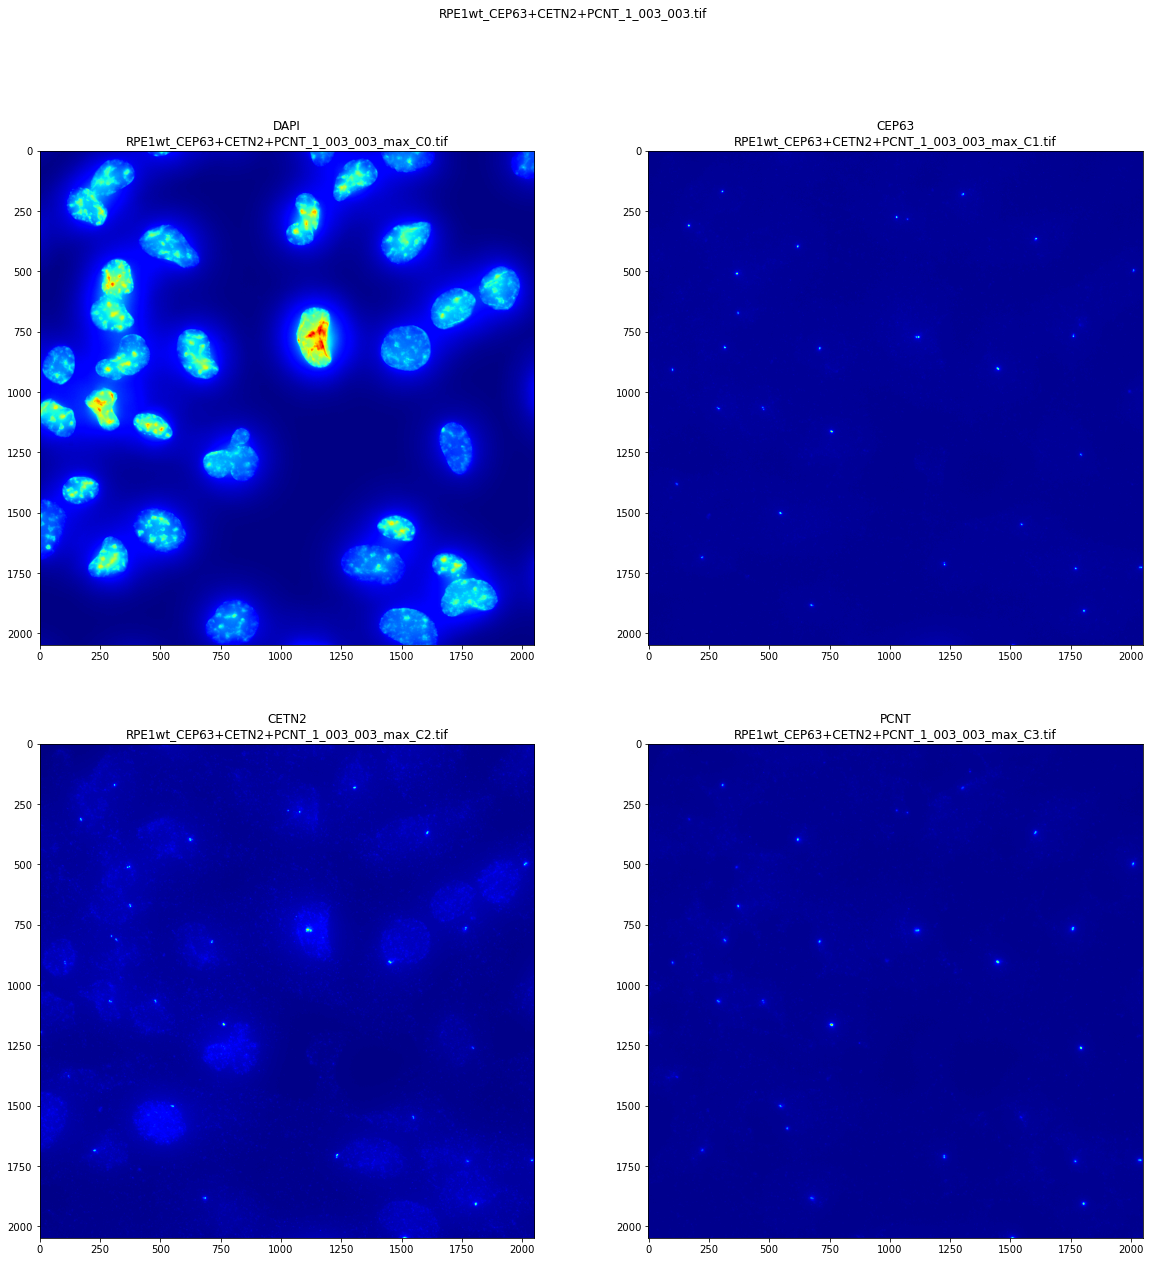

In [22]:
# show together
show(channel, id_)

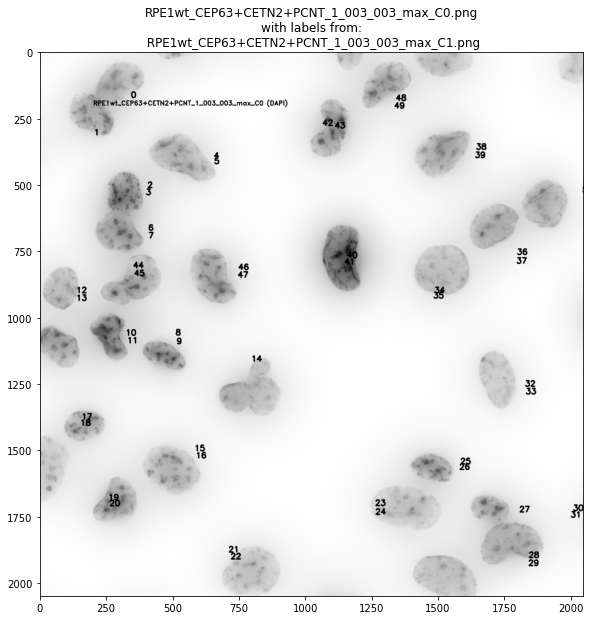

In [23]:
# Add numbers from C1 on C0, and show result (you can store it as well)
magnifyCentriole(channel, id_, from_subchannel=1, on_subchannel=0, format_='png',color = 0)

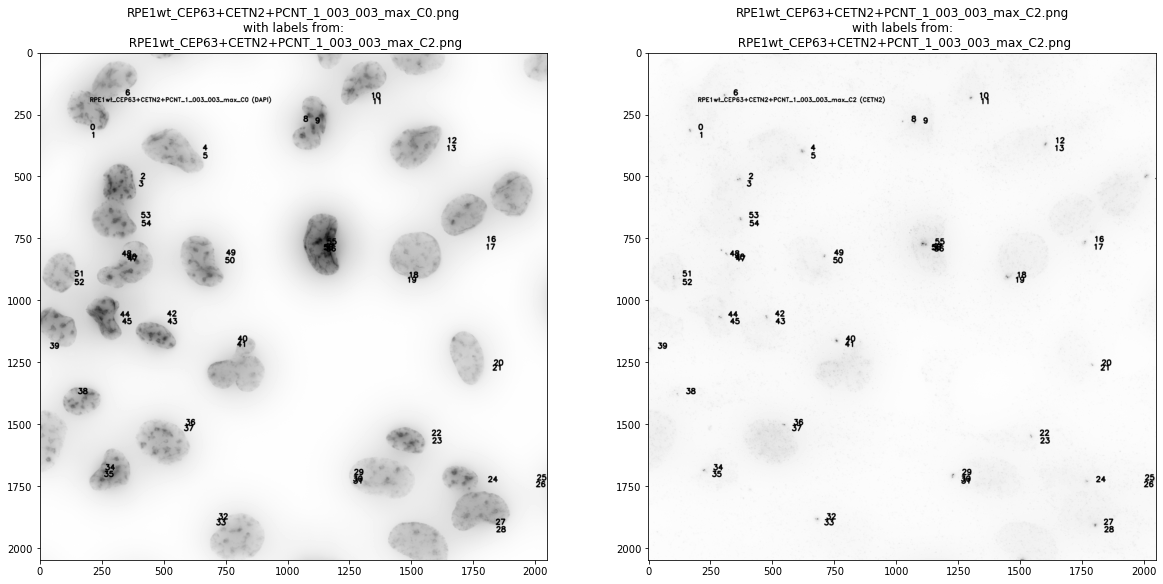

In [24]:
# If you want to compare with original
compare(channel, id_, from_subchannel = 2, format_='png')